## FEC Campaign Finance: 

### Contributions from committees to candidates & independent expenditures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy
from matplotlib import font_manager as fm, rcParams
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)

%matplotlib inline

In [2]:
year = '2018'

In [3]:
gave = pd.read_csv('data/04a_committee_stats.csv')
mask = [True if ('comm1__' in x) else False for x in gave['name']]
gave1 = gave[mask]
gave1.index = list(gave1['name'].values)

cand = pd.read_csv('data/04a_cand_cleaned.csv')
cands = list(set(cand['cand_id']))
cols = [x for x in list(gave1.columns) if x in cands]
cols.extend(['total', 'count', 'distinct', 'entity_tps'])
gave1 = gave1[['name'] + cols]
print(len(gave1))
gave1.head(2)

1264


,name,H0AL02087,H0AL05163,H0AL07086,H0AR01083,H0AR03055,H0AZ01259,H0CA03078,H0CA10073,H0CA10149,...,S8VT00141,S8WA00194,S8WA00319,S8WI00224,S8WV00143,S8WY00189,total,count,distinct,entity_tps
comm1__WATERFRONT STRATEGIES (against),comm1__WATERFRONT STRATEGIES (against),0,0,0,0,0,0,0,0,0,...,0,0,0,0,8003952,0,215198771,627,77,['enttp_Organization (not a committee and not ...
comm1__NEBO MEDIA (against),comm1__NEBO MEDIA (against),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,106207121,432,48,['enttp_Organization (not a committee and not ...


In [4]:
for col in gave1.columns:
    if gave1[col].sum() == 0:
        gave1.drop([col], axis = 1, inplace = True)
#         print(col)
        print('.', end = '')

............................................................................................................................................

In [5]:
counts = gave1.drop([
    'name', 
    'total', 
    'count', 
    'distinct', 
    'entity_tps',

], axis = 1)

for col in counts.columns:
    counts[col] = [1 if x > 0 else 0 for x in counts[col]]
    
print(len(counts.columns))
counts = counts.sum().sort_values(ascending = False)
counts[:20]

693


S8AZ00197    223
H8AZ08083    152
H8CA45130    129
S8NV00156    125
H8CA48035    111
H8CA39174    107
H8PA18181    102
S6MO00305    102
S6MT00162     96
H8OH12297     95
S6PA00217     92
H8CA25074     91
H8VA07094     87
H8FL26039     86
H8PA04090     85
S6OH00163     84
S2WI00219     80
S8FL00166     79
H8WA08189     78
H2NV04011     76
dtype: int64

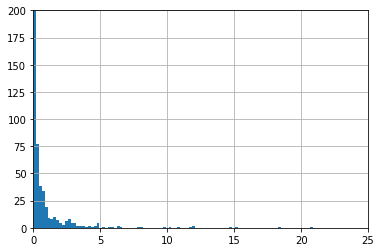

In [6]:
plt.figure()

(gave1['total']/1.0E6).hist(bins = 1000)

plt.xlim([0, 25])
plt.ylim([0, 200])

plt.show();

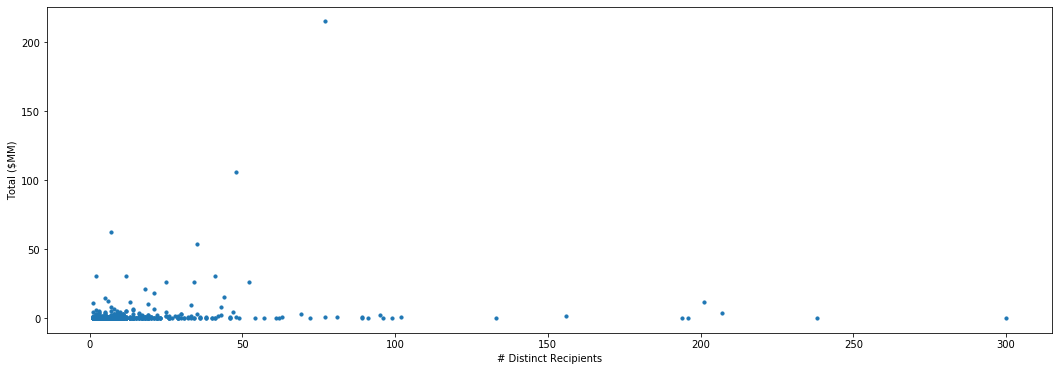

In [7]:
plt.figure(figsize = (18, 6))

plt.scatter(
    gave1['distinct'], 
    gave1['total']/1.0E6, 
    s = 10,
)
plt.xlabel('# Distinct Recipients')
plt.ylabel('Total ($MM)')
plt.show();

In [8]:
std_tot = gave1['total'].std()
med_tot = gave1['total'].median()

std_dist = gave1['distinct'].std()
med_dist = gave1['distinct'].median()

gave1_new = gave1[
    ~(
        (gave1['total'] < 1.*med_tot + 2.*std_tot) & \
        (gave1['distinct'] < 1.*med_dist + 2.*std_dist)
    ) \
#     & (gave1['distinct'] > 10)
]

len(gave1_new)

45

In [9]:
gave1_new['distinct'].value_counts().sort_index()

2      1
7      1
12     1
18     1
21     1
25     1
34     1
35     1
41     1
43     2
44     1
46     3
47     1
48     2
49     1
52     1
54     1
57     1
61     1
62     1
63     1
69     1
72     1
77     2
81     1
89     2
91     1
95     1
96     1
99     1
102    1
133    1
156    1
194    1
196    1
201    1
207    1
238    1
300    1
Name: distinct, dtype: int64

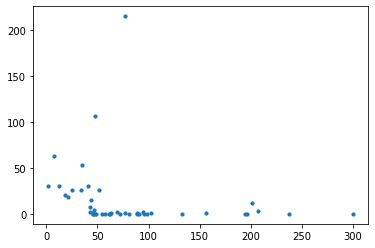

In [10]:
plt.figure()

plt.scatter(
    gave1_new['distinct'], 
    gave1_new['total']/1.0E6, 
    s = 10,
)
plt.show();

In [11]:
rows = []
for comm in list(gave1_new.index):
    lil_row = []
    lil_cand = cand[cand[comm] > 0]
    for which in ['Republican', 'Democrat', 'Third party']:    
        liller_cand = lil_cand[lil_cand['cand_pty_affiliation'] == which]
        lil_row.append(liller_cand[comm].sum())
        lil_row.append(len(liller_cand.drop_duplicates(['cand_id'], keep = 'first')))
    rows.append(lil_row)
    
rows = pd.DataFrame(
    rows, 
    columns = [
        'r_amt', 
        'r_count', 
        'd_amt', 
        'd_count',
        't_amt',
        't_count',
    ], 
    index = list(gave1_new['name'].values), 
)

rows.sort_index(inplace = True)
rows.head()

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm1__AMPLIFY MEDIA (against),26185761.0,34,0.0,0,0.0,0
comm1__BULLY PULPIT INTERACTIVE (against),26327402.0,52,0.0,0,0.0,0
comm1__BULLY PULPIT INTERACTIVE (for),0.0,0,15183259.0,44,0.0,0
comm1__COLUMBIA ROAD MEDIA (for),0.0,0,1668.0,96,0.0,0
comm1__CONNECTION STRATEGY (against),0.0,0,729339.0,46,0.0,0


In [12]:
rows[(rows['r_amt'] != 0) & (rows['d_amt'] != 0)].sort_index()

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm1__CONNECTION STRATEGY (for),2440129.0,90,22254.0,5,0.0,0
comm1__DEMOCRACY LIVE (for),338.0,5,12905.0,187,136.0,2
comm1__EVERYTOWN FOR GUN SAFETY ACTION FUND (against),1910.0,191,50.0,5,0.0,0
comm1__FACEBOOK (against),549406.0,71,210165.0,31,0.0,0
comm1__FACEBOOK (for),360624.0,71,3293982.0,136,0.0,0
comm1__FEDERAL CAPITOL COMMUNICATIONS CORP (for),17625.0,47,750.0,2,0.0,0
comm1__FP1 STRATEGIES (against),2000.0,1,8055208.0,42,0.0,0
comm1__HUSTLE (for),12277.0,7,210442.0,65,0.0,0
comm1__INDIVISIBLE PROJECT (for),42.0,1,40317.0,45,0.0,0
comm1__LINCOLN LOOP (for),35.0,1,8260.0,235,70.0,2


In [13]:
rows['cm'] = [x.replace('comm1__', '').replace(' (for)', '').replace(' (against)', '') for x in list(rows.index)]

these = sorted(list(rows['cm'].value_counts()[rows['cm'].value_counts() > 1].index))

these

['BULLY PULPIT INTERACTIVE',
 'CONNECTION STRATEGY',
 'FACEBOOK',
 'FEDERAL CAPITOL COMMUNICATIONS CORP',
 'MASTER PRINT',
 'PROLIST',
 'SKDKNICKERBOCKER',
 'WATERFRONT STRATEGIES']

In [14]:
def plot_foragainst(this):
    # 'this' (committee) both advocated and opposed
    this_cm = cand.loc[
        (cand[f'comm1__{this} (against)'] >= 0) & \
        (cand[f'comm1__{this} (for)'] >= 0), [
            'cand_id',
            'cand_name',
            'contest',
            'cand_pty_affiliation',
            'cand_ici',
            f'comm1__{this} (for)',
            f'comm1__{this} (against)',
    ]].sort_values(['cand_pty_affiliation', f'comm1__{this} (for)'], ascending = [True, False])
    
    mask = [False if ((this_cm.loc[i, f'comm1__{this} (for)'] == 0) & \
                      (this_cm.loc[i, f'comm1__{this} (against)'] == 0)) else True for i in list(this_cm.index)]
    
    this_cm = this_cm[mask]
    print(this_cm[[
        'cand_pty_affiliation', 
        'cand_name', 
        f'comm1__{this} (for)', 
        f'comm1__{this} (against)', 
    ]].to_csv(None))
    this_cm.loc[this_cm[f'comm1__{this} (against)'] == 0, f'comm1__{this} (against)'] = 1
    this_cm.loc[this_cm[f'comm1__{this} (for)'] == 0, f'comm1__{this} (for)'] = 1
    
    max_amt = max(this_cm[f'comm1__{this} (for)'].max(), this_cm[f'comm1__{this} (against)'].max())
    min_amt = min(this_cm[f'comm1__{this} (for)'].min(), this_cm[f'comm1__{this} (against)'].min())

    party_dict = {
            'Republican' : {
                'hex' : '#FF6661', 
                'mult' : 0,#0.3, 
                'party' : 'Republican',
            },
            'Democrat' : {
                'hex' : '#5494F7', 
                'mult' : 0,#-0.3, 
                'party' : 'Democrat',
            },
            'Third party' : {
                'hex' : '#15DCDC',
                'mult' : 0,
                'party' : 'Third party',
            }
        }

    ici_dict = {
        'I' : ['o', 'incumbent'],
        'C' : ['D', 'challenger'],
        'O' : ['+', 'open'],
    }

    vol_light = '#f8fbfc'
    vol_dark = '#263C4D'

    fig = plt.figure(figsize = (8, 8))

    # face/axis colors
    fig.patch.set_facecolor(vol_light)
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor(vol_light)

    vol_dark_rcparams = [
        'patch.edgecolor',
        'grid.color',
        'text.color',
        'axes.labelcolor',
        'xtick.color',
        'ytick.color',
        'axes.edgecolor'
    ]

    for which in vol_dark_rcparams:
        plt.rcParams[which] = vol_dark

    font_dirs = ['../../css/fonts/for_matplotlib/', ]
    font_files = fm.findSystemFonts(fontpaths=font_dirs)
    font_list = fm.createFontList(font_files)
    fm.fontManager.ttflist.extend(font_list)

    plt.rcParams['font.family'] = 'DM Sans Medium'
    
    parties = list(set(this_cm['cand_pty_affiliation']))
    all_icis = list(set(this_cm['cand_ici']))
    
    for pty in parties:
        lil_this_cm = this_cm[this_cm['cand_pty_affiliation'] == pty]
        icis = list(set(lil_this_cm['cand_ici']))
        for ici in icis:
            liller_this_cm = lil_this_cm[lil_this_cm['cand_ici'] == ici]
            alpha = 0.75
            lw = 1.5
            s = 100
            if ici in ['I', 'C']:
                plt.scatter(
                    np.log10(liller_this_cm[f'comm1__{this} (for)']),
                    np.log10(liller_this_cm[f'comm1__{this} (against)']),
                    color = party_dict[pty]['hex'],
                    s = s,
                    lw = lw,
                    alpha = alpha,
                    facecolors = 'none',
                    marker = ici_dict[ici][0],
                )
            else:
                plt.scatter(
                    np.log10(liller_this_cm[f'comm1__{this} (for)']),
                    np.log10(liller_this_cm[f'comm1__{this} (against)']),
                    color = party_dict[pty]['hex'],
                    s = s,
                    lw = lw,
                    alpha = alpha,
                    marker = ici_dict[ici][0],
                )

    plt.title(f'{year} U.S. Congressional Elections:\n{this}\nIndependent Expenditures', fontsize = 18)
    plt.xlabel('\n'.join(['Total contribution\nADVOCATING candidate (USD)']), fontsize = 14)
    locs = range(0, int(np.log10(max_amt)) + 10)
    vals = ['${:,}'.format(10**x) for x in locs]
    vals = [x.replace(',000,000,000', '')+'B' if (',000,000,000' in x) else x for x in vals]
    vals = [x.replace(',000,000', '')+'M' if (',000,000' in x) else x for x in vals]
    vals = [x.replace(',000', '')+'K' if (',000' in x) else x for x in vals]
    plt.xticks(locs, vals, fontsize = 12)
    plt.ylabel('\n'.join(['Total contribution\nOPPOSING candidate (USD)']), fontsize = 14)
    plt.yticks(locs,vals, fontsize = 12)
    plt.plot(
        [0, 1.2*np.log10(max_amt)], 
        [0, 1.2*np.log10(max_amt)], 
        ls = '--', 
        alpha = 0.3, 
        color = vol_dark,
    )
    
    legend_elements = []
    
    if 'Republican' in parties:
        legend_elements.append(
            mpatches.Patch(
                [0], 
                [0], 
                color=party_dict['Republican']['hex'], 
                label='Republican'
            )
        )
    if 'Democrat' in parties:
        legend_elements.append(
            mpatches.Patch(
                [0], 
                [0], 
                color=party_dict['Democrat']['hex'], 
                label='Democrat', 
            )
        )
    if 'Third party' in parties:
        legend_elements.append(
            mpatches.Patch(
                [0], 
                [0], 
                color=party_dict['Third party']['hex'], 
                label='Third party', 
            )
        )
    if 'I' in all_icis:
        legend_elements.append(
            Line2D(
                [0], 
                [0], 
                marker='o', 
                color=vol_light, 
                label='Incumbent', 
                markerfacecolor='#446d8c', 
                markersize=9,
            )
        )
    if 'C' in all_icis:
        legend_elements.append(
            Line2D(
                [0], 
                [0], 
                marker='D', 
                color=vol_light, 
                label='Challenger', 
                markerfacecolor='#446d8c', 
                markersize=9,
            )
        )
    if 'O' in all_icis:
        legend_elements.append(
            Line2D(
                [0], 
                [0], 
                marker='P', 
                color=vol_light, 
                label='Open seat', 
                markerfacecolor='#446d8c', 
                markersize=9,
            )
        )
    legend = plt.legend(
        loc='upper right', 
        fontsize=12, 
        facecolor='#f8fbfc', 
        handles=legend_elements,
    )
    
    x = ax.annotate('Source: FEC.gov', 
                    xy=(0.0, 0.0), 
                    xytext=(38.0, -28.0), 
                    ha='center', 
                    va='bottom', 
                    textcoords='axes pixels', 
                    xycoords='axes pixels',
                   )
    # logo
    arr_img = plt.imread('../../assets/VOL_Logo_Color_Light_Green.png')
    imagebox = OffsetImage(arr_img, zoom=0.07)
    imagebox.image.axes = ax
    xy = (0.0, -45.0)
    ab = AnnotationBbox(imagebox, 
                        xy,
                        xybox=(xy[0], xy[1]),
                        xycoords='axes pixels',
                        boxcoords=('axes pixels'),
                        box_alignment=(0., 0.),
                        frameon=False,
                       )
    ax.add_artist(ab)
    plt.show();
    return this_cm
#     except:
#         print('committee did not both advocate and oppose')
#         return

BULLY PULPIT INTERACTIVE
,cand_pty_affiliation,cand_name,comm1__BULLY PULPIT INTERACTIVE (for),comm1__BULLY PULPIT INTERACTIVE (against)
886,Democrat,"NELSON, BILL",4456919.0,0.0
491,Democrat,"MCBATH, LUCIA KAY MS.",1120349.0,0.0
873,Democrat,"MCCASKILL, CLAIRE",925485.0,0.0
916,Democrat,"ROSEN, JACKY",773570.0,0.0
835,Democrat,"SCHRIER, KIM DR.",741346.0,0.0
584,Democrat,"STEVENS, HALEY",701402.0,0.0
880,Democrat,"SINEMA, KYRSTEN",494809.0,0.0
859,Democrat,"DONNELLY, JOSEPH S",469438.0,0.0
824,Democrat,"WEXTON, JENNIFER",465320.0,0.0
580,Democrat,"SLOTKIN, ELISSA",458622.0,0.0
813,Democrat,"LURIA, ELAINE",363743.0,0.0
645,Democrat,"SHERRILL, REBECCA MICHELLE",301967.0,0.0
451,Democrat,"CROW, JASON",288370.0,0.0
591,Democrat,"PHILLIPS, DEAN",256597.0,0.0
523,Democrat,"UNDERWOOD, LAUREN A",254120.0,0.0
720,Democrat,"HOULAHAN, CHRISSY",175216.0,0.0
403,Democrat,"HARDER, JOSH",170556.0,0.0
831,Democrat,"LONG, CAROLYN N.",160356.0,0.0
773,Democrat,"FLETCHER, ELIZABETH",159880.0,0.0
323,Dem

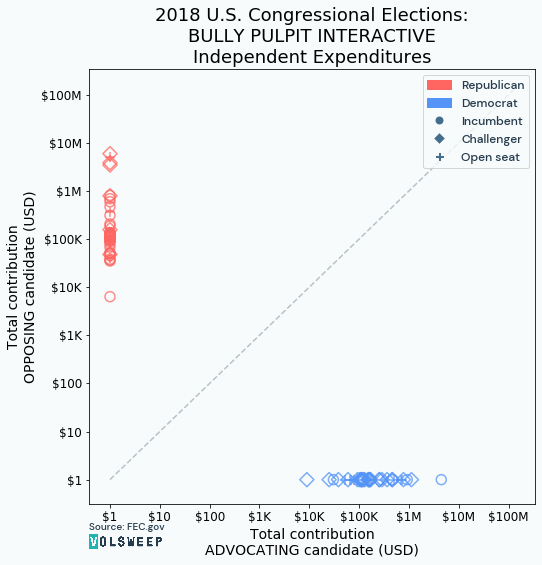

CONNECTION STRATEGY
,cand_pty_affiliation,cand_name,comm1__CONNECTION STRATEGY (for),comm1__CONNECTION STRATEGY (against)
699,Democrat,"O'CONNOR, DANIEL JAY",21012.0,210.0
636,Democrat,"KIM, ANDY",493.0,735.0
536,Democrat,"DAVIS, PAUL T.",338.0,249.0
715,Democrat,"SCOTT, GEORGE",278.0,285.0
652,Democrat,"TORRES SMALL, XOCHITL",133.0,0.0
321,Democrat,"DRISKELL, GRETCHEN",0.0,203.0
373,Democrat,"GALVIN, ALYSE",0.0,75000.0
390,Democrat,"TIPIRNENI, HIRAL",0.0,18675.0
403,Democrat,"HARDER, JOSH",0.0,886.0
415,Democrat,"HILL, KATHERINE LAUREN",0.0,929.0
425,Democrat,"CISNEROS, GILBERT",0.0,493.0
432,Democrat,"PORTER, KATHERINE",0.0,809.0
465,Democrat,"SODERBERG, NANCY",0.0,146.0
475,Democrat,"CARLSON, KRISTEN",0.0,104.0
491,Democrat,"MCBATH, LUCIA KAY MS.",0.0,97.0
504,Democrat,"AXNE, CINDY",0.0,237.0
519,Democrat,"KELLY, BRENDAN",0.0,301.0
521,Democrat,"LONDRIGAN, BETSY DIRKSEN",0.0,338.0
523,Democrat,"UNDERWOOD, LAUREN A",0.0,259.0
538,Democrat,"DAVIDS, SHARICE",0.0,166.0
540,Democrat,"THO

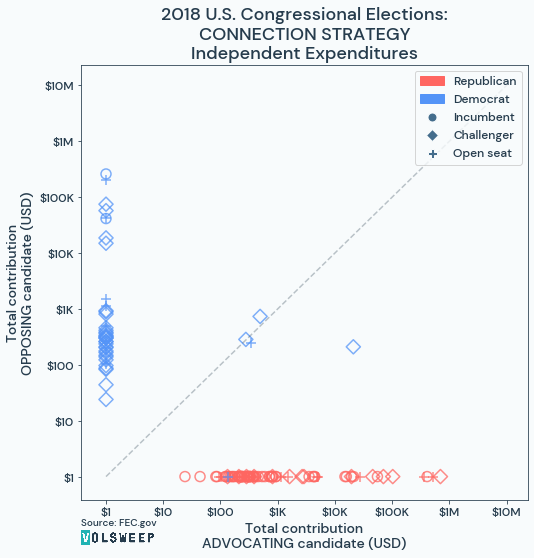

FACEBOOK
,cand_pty_affiliation,cand_name,comm1__FACEBOOK (for),comm1__FACEBOOK (against)
886,Democrat,"NELSON, BILL",302867.0,4581.0
924,Democrat,"O'ROURKE, ROBERT (BETO)",247405.0,982.0
873,Democrat,"MCCASKILL, CLAIRE",225248.0,30390.0
880,Democrat,"SINEMA, KYRSTEN",134505.0,20308.0
876,Democrat,"BROWN, SHERROD",126902.0,3345.0
859,Democrat,"DONNELLY, JOSEPH S",118801.0,977.0
874,Democrat,"TESTER, JON",99584.0,15274.0
869,Democrat,"BALDWIN, TAMMY",88696.0,16868.0
916,Democrat,"ROSEN, JACKY",77632.0,0.0
584,Democrat,"STEVENS, HALEY",49829.0,0.0
820,Democrat,"SPANBERGER, ABIGAIL",48120.0,8086.0
835,Democrat,"SCHRIER, KIM DR.",47735.0,0.0
737,Democrat,"LAMB, CONOR",47643.0,3032.0
437,Democrat,"CAMPA-NAJJAR, AMMAR",46818.0,0.0
538,Democrat,"DAVIDS, SHARICE",40452.0,0.0
403,Democrat,"HARDER, JOSH",40424.0,300.0
333,Democrat,"GOTTHEIMER, JOSH",36217.0,0.0
589,Democrat,"FEEHAN, DANIEL",36111.0,486.0
519,Democrat,"KELLY, BRENDAN",34758.0,0.0
435,Democrat,"LEVIN, MIKE",34630.0,0.0
434,Democrat

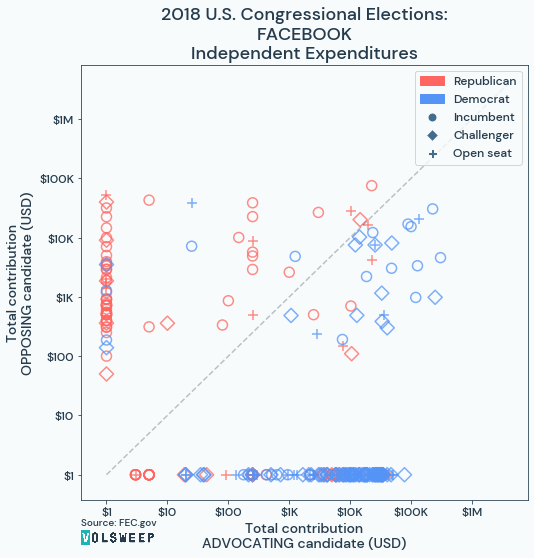

FEDERAL CAPITOL COMMUNICATIONS CORP
,cand_pty_affiliation,cand_name,comm1__FEDERAL CAPITOL COMMUNICATIONS CORP (for),comm1__FEDERAL CAPITOL COMMUNICATIONS CORP (against)
536,Democrat,"DAVIS, PAUL T.",375.0,375.0
636,Democrat,"KIM, ANDY",375.0,750.0
321,Democrat,"DRISKELL, GRETCHEN",0.0,375.0
403,Democrat,"HARDER, JOSH",0.0,375.0
415,Democrat,"HILL, KATHERINE LAUREN",0.0,375.0
425,Democrat,"CISNEROS, GILBERT",0.0,375.0
432,Democrat,"PORTER, KATHERINE",0.0,375.0
465,Democrat,"SODERBERG, NANCY",0.0,375.0
475,Democrat,"CARLSON, KRISTEN",0.0,375.0
491,Democrat,"MCBATH, LUCIA KAY MS.",0.0,375.0
504,Democrat,"AXNE, CINDY",0.0,375.0
519,Democrat,"KELLY, BRENDAN",0.0,375.0
521,Democrat,"LONDRIGAN, BETSY DIRKSEN",0.0,375.0
523,Democrat,"UNDERWOOD, LAUREN A",0.0,375.0
538,Democrat,"DAVIDS, SHARICE",0.0,375.0
546,Democrat,"MCGRATH, AMY",0.0,375.0
575,Democrat,"GOLDEN, JARED",0.0,375.0
589,Democrat,"FEEHAN, DANIEL",0.0,375.0
596,Democrat,"RADINOVICH, JOSEPH",0.0,375.0
613,Democrat,"COLEMAN, LINDA",

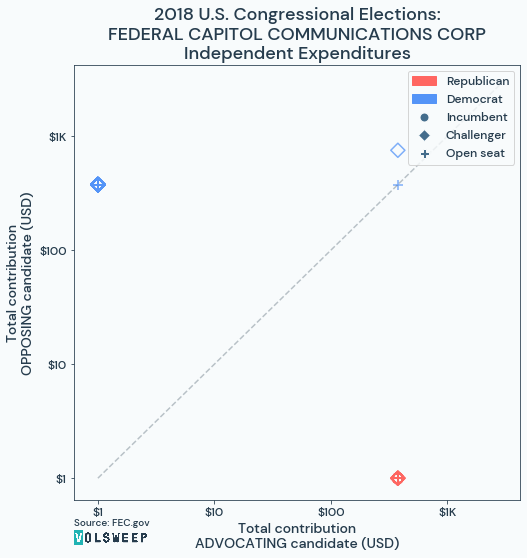

MASTER PRINT
,cand_pty_affiliation,cand_name,comm1__MASTER PRINT (for),comm1__MASTER PRINT (against)
536,Democrat,"DAVIS, PAUL T.",485.0,701.0
636,Democrat,"KIM, ANDY",163.0,869.0
321,Democrat,"DRISKELL, GRETCHEN",0.0,635.0
403,Democrat,"HARDER, JOSH",0.0,284.0
404,Democrat,"COX, TERRANCE JOHN (TJ)",0.0,160.0
413,Democrat,"JANZ, ANDREW",0.0,160.0
415,Democrat,"HILL, KATHERINE LAUREN",0.0,641.0
425,Democrat,"CISNEROS, GILBERT",0.0,534.0
432,Democrat,"PORTER, KATHERINE",0.0,606.0
434,Democrat,"ROUDA, HARLEY E JR",0.0,371.0
465,Democrat,"SODERBERG, NANCY",0.0,682.0
475,Democrat,"CARLSON, KRISTEN",0.0,612.0
491,Democrat,"MCBATH, LUCIA KAY MS.",0.0,306.0
503,Democrat,"FINKENAUER, ABBY",0.0,971.0
504,Democrat,"AXNE, CINDY",0.0,610.0
519,Democrat,"KELLY, BRENDAN",0.0,541.0
521,Democrat,"LONDRIGAN, BETSY DIRKSEN",0.0,485.0
523,Democrat,"UNDERWOOD, LAUREN A",0.0,365.0
538,Democrat,"DAVIDS, SHARICE",0.0,383.0
546,Democrat,"MCGRATH, AMY",0.0,719.0
575,Democrat,"GOLDEN, JARED",0.0,731.0
589,Democr

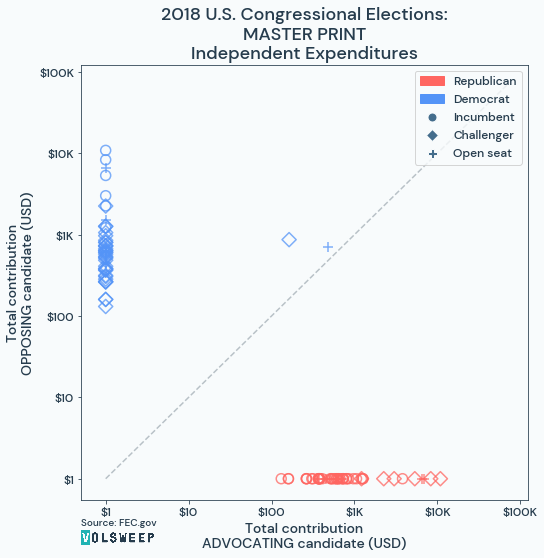

PROLIST
,cand_pty_affiliation,cand_name,comm1__PROLIST (for),comm1__PROLIST (against)
536,Democrat,"DAVIS, PAUL T.",4811.0,13430.0
519,Democrat,"KELLY, BRENDAN",3277.0,13728.0
117,Democrat,"PETERSON, COLLIN CLARK",1561.0,0.0
636,Democrat,"KIM, ANDY",484.0,11609.0
321,Democrat,"DRISKELL, GRETCHEN",0.0,10875.0
323,Democrat,"CRAIG, ANGELA DAWN",0.0,616.0
381,Democrat,"TUCKER, EVERETT CLARKE IV",0.0,1064.0
403,Democrat,"HARDER, JOSH",0.0,3896.0
415,Democrat,"HILL, KATHERINE LAUREN",0.0,4747.0
425,Democrat,"CISNEROS, GILBERT",0.0,2937.0
432,Democrat,"PORTER, KATHERINE",0.0,3935.0
434,Democrat,"ROUDA, HARLEY E JR",0.0,793.0
435,Democrat,"LEVIN, MIKE",0.0,742.0
451,Democrat,"CROW, JASON",0.0,1321.0
465,Democrat,"SODERBERG, NANCY",0.0,10065.0
475,Democrat,"CARLSON, KRISTEN",0.0,9005.0
491,Democrat,"MCBATH, LUCIA KAY MS.",0.0,4724.0
503,Democrat,"FINKENAUER, ABBY",0.0,11892.0
504,Democrat,"AXNE, CINDY",0.0,11556.0
521,Democrat,"LONDRIGAN, BETSY DIRKSEN",0.0,12345.0
523,Democrat,"UNDERWOOD, LAUR

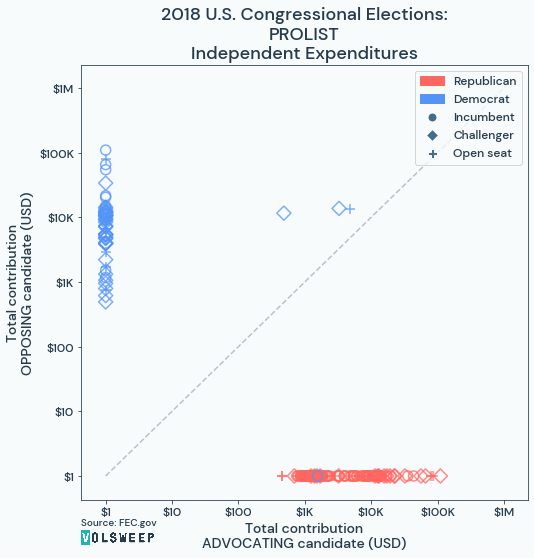

SKDKNICKERBOCKER
,cand_pty_affiliation,cand_name,comm1__SKDKNICKERBOCKER (for),comm1__SKDKNICKERBOCKER (against)
415,Democrat,"HILL, KATHERINE LAUREN",4528350.0,0.0
126,Democrat,"HORSFORD, STEVEN ALEXZANDER",2685960.0,0.0
580,Democrat,"SLOTKIN, ELISSA",2184757.0,0.0
465,Democrat,"SODERBERG, NANCY",1582252.0,0.0
835,Democrat,"SCHRIER, KIM DR.",1541042.0,0.0
773,Democrat,"FLETCHER, ELIZABETH",1160443.0,0.0
831,Democrat,"LONG, CAROLYN N.",1118931.0,0.0
492,Democrat,"BOURDEAUX, CAROLYN",935700.0,0.0
451,Democrat,"CROW, JASON",757823.0,0.0
538,Democrat,"DAVIDS, SHARICE",630846.0,0.0
711,Democrat,"HORN, KENDRA",451774.0,0.0
435,Democrat,"LEVIN, MIKE",355868.0,0.0
856,Democrat,"MANCHIN III, JOE",76273.0,0.0
659,Democrat,"GERSHON, PERRY",75000.0,0.0
854,Democrat,"FEINSTEIN, DIANNE",75000.0,0.0
591,Democrat,"PHILLIPS, DEAN",67800.0,0.0
457,Democrat,"HAYES, JAHANA",65000.0,0.0
485,Democrat,"SHALALA, DONNA",39348.0,0.0
720,Democrat,"HOULAHAN, CHRISSY",37550.0,0.0
824,Democrat,"WEXTON, JENNIFER",3

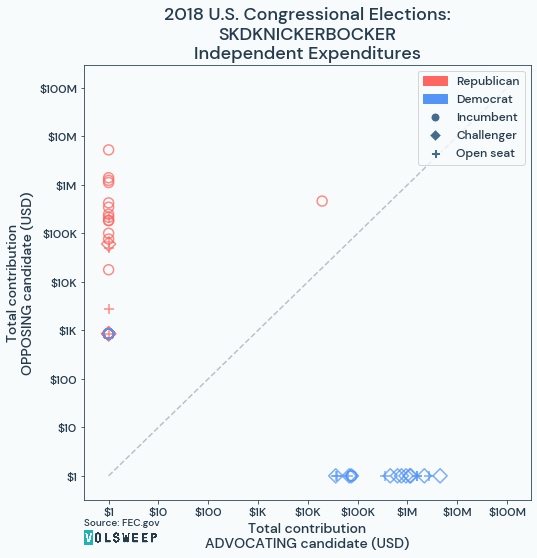

WATERFRONT STRATEGIES
,cand_pty_affiliation,cand_name,comm1__WATERFRONT STRATEGIES (for),comm1__WATERFRONT STRATEGIES (against)
886,Democrat,"NELSON, BILL",7126392.0,0.0
856,Democrat,"MANCHIN III, JOE",4573155.0,0.0
859,Democrat,"DONNELLY, JOSEPH S",2706398.0,0.0
923,Democrat,"BREDESEN, PHILIP",1960048.0,0.0
869,Democrat,"BALDWIN, TAMMY",1499350.0,0.0
873,Democrat,"MCCASKILL, CLAIRE",1453763.0,0.0
580,Democrat,"SLOTKIN, ELISSA",1371118.0,0.0
862,Democrat,"HEITKAMP, HEIDI",839015.0,0.0
589,Democrat,"FEEHAN, DANIEL",810260.0,0.0
538,Democrat,"DAVIDS, SHARICE",784905.0,0.0
880,Democrat,"SINEMA, KYRSTEN",771016.0,0.0
874,Democrat,"TESTER, JON",742428.0,0.0
491,Democrat,"MCBATH, LUCIA KAY MS.",660000.0,0.0
641,Democrat,"MALINOWSKI, TOM",656058.0,0.0
835,Democrat,"SCHRIER, KIM DR.",627693.0,0.0
575,Democrat,"GOLDEN, JARED",626791.0,0.0
435,Democrat,"LEVIN, MIKE",516746.0,0.0
816,Democrat,"COCKBURN, LESLIE",420196.0,0.0
613,Democrat,"COLEMAN, LINDA",409050.0,0.0
625,Democrat,"SCHNEIDER, MAC S

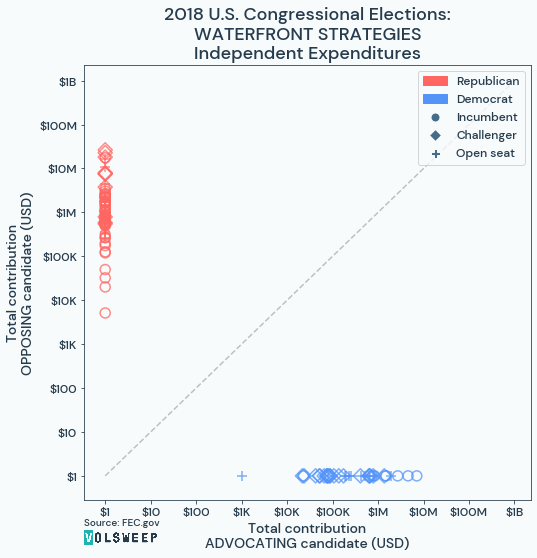

In [15]:
for thislet in these:
    print(thislet)
    plot_foragainst(thislet)

In [16]:
# HUSTLE advocated Republicans
cand.loc[
    (cand['comm1__HUSTLE (for)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Republican'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__HUSTLE (for)',
]].sort_values(['comm1__HUSTLE (for)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__HUSTLE (for)
9,H0CA19173,"DENHAM, JEFF",CA_10,Republican,I,3896.0
350,H6PA08277,"FITZPATRICK, BRIAN",PA_01,Republican,I,2864.0
191,H4FL26038,"CURBELO, CARLOS MR.",FL_26,Republican,I,1746.0
299,H6IL06117,"ROSKAM, PETER",IL_06,Republican,I,1152.0
506,H8ID01124,"FULCHER, RUSS",ID_01,Republican,O,1104.0
738,H8PA18199,"RESCHENTHALER, GUY MR.",PA_14,Republican,O,997.0
224,H4NJ03130,"MACARTHUR, THOMAS",NJ_03,Republican,I,518.0


In [17]:
# GOOGLE both advocated and opposed
cand.loc[
    (cand['comm1__GOOGLE (against)'] > 0) & \
    (cand['comm1__GOOGLE (for)'] > 0), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__GOOGLE (for)',
        'comm1__GOOGLE (against)',
]].sort_values(['comm1__GOOGLE (for)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__GOOGLE (for),comm1__GOOGLE (against)
866,S2TX00312,"CRUZ, RAFAEL EDWARD TED",TX_senate,Republican,I,21167.0,785.0
874,S6MT00162,"TESTER, JON",MT_senate,Democrat,I,3848.0,25.0


In [18]:
# SKDKNICKERBOCKER advocated a Republican
cand.loc[
    (cand['comm1__SKDKNICKERBOCKER (for)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Republican'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__SKDKNICKERBOCKER (for)',
]].sort_values(['comm1__SKDKNICKERBOCKER (for)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__SKDKNICKERBOCKER (for)
26,H0IL14080,"HULTGREN, RANDY",IL_14,Republican,I,19392.0


In [19]:
# SKDKNICKEBOCKER opposed a Democrat
cand.loc[
    (cand['comm1__SKDKNICKERBOCKER (against)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Democrat'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__SKDKNICKERBOCKER (against)',
]].sort_values(['comm1__SKDKNICKERBOCKER (against)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__SKDKNICKERBOCKER (against)
94,H2GA02031,"BISHOP, SANFORD D",GA_02,Democrat,I,851.0
117,H2MN07014,"PETERSON, COLLIN CLARK",MN_07,Democrat,I,851.0
156,H2TX23082,"CUELLAR, HENRY R.",TX_28,Democrat,I,851.0
370,H6WI03099,"KIND, RONALD JAMES",WI_03,Democrat,I,851.0
713,H8OR05107,"SCHRADER, KURT",OR_05,Democrat,I,851.0


In [20]:
cand[cand['comm1__SKDKNICKERBOCKER (against)'] > 0]

,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,(for) count,(for) sum,(against) count,(against) sum,(coord pty exp) count,(coord pty exp) sum,(in-kind) count,(in-kind) sum,(nonaffiliated) count,(nonaffiliated) sum
0,H0AL02087,"ROBY, MARTHA",I,Republican,2573681.12,85734.19,2277448.83,0.00,45450.72,341683.01,...,3.0,353829.0,3.0,933.0,0.0,0.0,0.0,0.0,4.0,1646955.0
1,H0AL05163,"BROOKS, MO",I,Republican,1527246.16,0.00,2006001.97,0.00,1170937.70,692181.51,...,3.0,4703.0,2.0,861.0,0.0,0.0,0.0,0.0,3.0,250700.0
3,H0AR01083,"CRAWFORD, ERIC ALAN RICK",I,Republican,1019464.16,0.00,966616.64,0.00,258577.00,311424.52,...,0.0,0.0,2.0,861.0,0.0,0.0,0.0,0.0,5.0,463750.0
4,H0AR03055,"WOMACK, STEVE",I,Republican,1211826.66,0.00,1218424.03,0.00,1165816.16,1159218.79,...,0.0,0.0,2.0,861.0,0.0,0.0,1.0,135.0,4.0,633500.0
5,H0AZ01259,"GOSAR, PAUL DR.",I,Republican,588764.42,16108.36,575157.87,0.00,107593.03,121199.58,...,5.0,13088.0,2.0,861.0,0.0,0.0,1.0,200.0,3.0,208349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,S8MS00196,"WICKER, ROGER F",I,Republican,6113589.06,586579.37,5881444.87,0.00,1620434.00,1852578.42,...,1.0,9004.0,3.0,918.0,0.0,0.0,2.0,1900.0,4.0,2246850.0
918,S8OH00102,"RENACCI, JAMES B.",C,Republican,12061786.51,1427954.48,12664106.42,12861.54,624545.32,22225.48,...,12.0,973748.0,35.0,37103.0,0.0,0.0,0.0,0.0,2.0,432356.0
920,S8PA00320,"BARLETTA, LOU",C,Republican,7407078.74,281757.79,7760181.65,88070.00,397460.61,44356.35,...,9.0,120000.0,7.0,1158460.0,1.0,4874.0,0.0,0.0,2.0,463128.0
922,S8TN00337,"BLACKBURN, MARSHA MRS.",O,Republican,14634619.97,2061568.42,16572477.70,20849.00,2551958.17,614100.03,...,62.0,8722145.0,9.0,16905939.0,1.0,1019962.0,3.0,2896.0,5.0,1526740.0


In [21]:
# FP1 STRATEGIES opposed a Republican
cand.loc[
    (cand['comm1__FP1 STRATEGIES (against)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Republican'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__FP1 STRATEGIES (against)',
]].sort_values(['comm1__FP1 STRATEGIES (against)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__FP1 STRATEGIES (against)
105,H2IL13120,"DAVIS, RODNEY L",IL_13,Republican,I,2000.0


In [22]:
gave1_newest = pd.concat([gave1_new, rows], axis = 1)
gave1_newest['name'] = [x.replace('comm1__', '') for x in gave1_newest['name']]
gave1_newest.reset_index(drop = True, inplace = True)
gave1_newest['r_amt:total'] = gave1_newest['r_amt']/(gave1_newest['r_amt'] + gave1_newest['d_amt'])
gave1_newest['r_count:total'] = gave1_newest['r_count']/(gave1_newest['r_count'] + gave1_newest['d_count'])
print(len(gave1_newest))
gave1_newest.head()

45


,name,H0AL02087,H0AL05163,H0AL07086,H0AR01083,H0AR03055,H0AZ01259,H0CA03078,H0CA10073,H0CA10149,...,entity_tps,r_amt,r_count,d_amt,d_count,t_amt,t_count,cm,r_amt:total,r_count:total
0,AMPLIFY MEDIA (against),0,0,0,0,0,0,0,0,0,...,['enttp_Organization (not a committee and not ...,26185761.0,34,0.0,0,0.0,0,AMPLIFY MEDIA,1.0,1.0
1,BULLY PULPIT INTERACTIVE (against),0,0,0,0,0,0,0,0,0,...,['enttp_Organization (not a committee and not ...,26327402.0,52,0.0,0,0.0,0,BULLY PULPIT INTERACTIVE,1.0,1.0
2,BULLY PULPIT INTERACTIVE (for),0,0,0,0,0,0,0,0,0,...,['enttp_Organization (not a committee and not ...,0.0,0,15183259.0,44,0.0,0,BULLY PULPIT INTERACTIVE,0.0,0.0
3,COLUMBIA ROAD MEDIA (for),0,0,0,0,0,0,0,0,0,...,['enttp_Organization (not a committee and not ...,0.0,0,1668.0,96,0.0,0,COLUMBIA ROAD MEDIA,0.0,0.0
4,CONNECTION STRATEGY (against),0,0,0,0,0,0,0,0,0,...,"[nan, 'enttp_Organization (not a committee and...",0.0,0,729339.0,46,0.0,0,CONNECTION STRATEGY,0.0,0.0


In [23]:
gave1_newest.to_csv('data/04bi_committee1_stats.csv', index = False)

In [24]:
# get subset of column names containing 'comm1__'
comms = [x for x in cand.columns if 'comm1__' in x]

# remove the 'comm1__'
comms = [x.replace('comm1__', '') for x in comms]

# keep committee columns that appear in 'name' column
comms = [x for x in comms if x in list(gave1_newest['name'])]

# add the 'comm1__' back on
comms = sorted(['comm1__' + x for x in comms])

# get the non-'comm1__' columns
notcomm_cols = [x for x in cand.columns if 'comm1__' not in x]

# non-'comm1__' dataframe subset
cand_notcomm = cand[notcomm_cols]

# concatenate 'comm1__' and non-'comm1__' dataframes
cand = pd.concat([cand_notcomm, cand[comms]], axis = 1)

cand.head(2)

,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,comm1__SIERRA CLUB (for),comm1__SKDKNICKERBOCKER (against),comm1__SKDKNICKERBOCKER (for),comm1__SOLIDARITY STRATEGIES (for),comm1__TELE-TOWN HALL (for),comm1__THE PIVOT GROUP (for),comm1__TWILIO (for),comm1__UNITED STATES POSTAL SERVICE (for),comm1__WATERFRONT STRATEGIES (against),comm1__WATERFRONT STRATEGIES (for)
0,H0AL02087,"ROBY, MARTHA",I,Republican,2573681.12,85734.19,2277448.83,0.0,45450.72,341683.01,...,0.0,851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,H0AL05163,"BROOKS, MO",I,Republican,1527246.16,0.00,2006001.97,0.0,1170937.70,692181.51,...,0.0,851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
for which in [0, 1]:
    print('proportion to R:', which, '\n')
    those = gave1_newest.loc[gave1_newest['r_amt:total'] == which, ['name', 'total']]
    print(those)
    print('\n')

proportion to R: 0 

                                             name     total
2                  BULLY PULPIT INTERACTIVE (for)  15183259
3                       COLUMBIA ROAD MEDIA (for)      1668
4                   CONNECTION STRATEGY (against)    729339
6                         DEL RAY MEDIA (against)  53479620
11  FEDERAL CAPITOL COMMUNICATIONS CORP (against)     17625
19              MAIN STREET MEDIA GROUP (against)  62565152
20                         MASTER PRINT (against)     67007
22                         MATSON MEDIA (against)  30237853
23                    MOTHERSHIP STRATEGIES (for)   2598130
25                PDQ PRINTING OF LAS VEGAS (for)     73933
26                    PINPOINT WEBSOLUTIONS (for)     44412
27                                     PPWS (for)     15663
29                              PROLIST (against)    789807
31                RED EAGLE MEDIA GROUP (against)  20687602
32                                  REV.COM (for)      1791
35                 

In [26]:
cand.to_csv('data/04bi_cand_cleaned.csv', index = False)